In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

# Load data

In [2]:
X_train = np.loadtxt('input_test.csv',delimiter=',')
Y_train = np.loadtxt('labels_test.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv',delimiter=',')
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [3]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255;
X_test = X_test/255

In [4]:
print("Shape of the X_Train:",X_train.shape)
print("Shape of the Y_Train:",Y_train.shape)
print("Shape of the X_Test:",X_test.shape)
print("Shape of the Y_Test",Y_test.shape)


Shape of the X_Train: (400, 100, 100, 3)
Shape of the Y_Train: (400, 1)
Shape of the X_Test: (400, 100, 100, 3)
Shape of the Y_Test (400, 1)


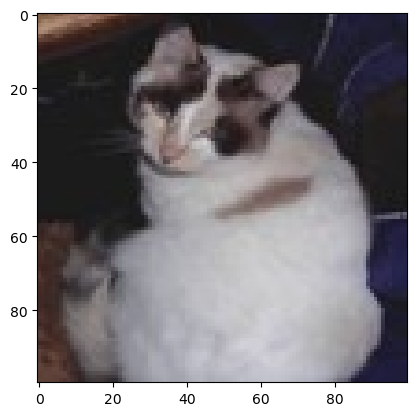

In [5]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

# Model 

In [6]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation = 'sigmoid')
    
])

C:\Users\Datta\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [8]:
model.compile(loss ='binary_crossentropy',optimizer='adam',metrics =['accuracy'])
                                                                    

In [12]:
model.fit(X_train,Y_train,epochs=15,batch_size=64)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8520 - loss: 0.2793
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9696 - loss: 0.1828
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9792 - loss: 0.1401
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9931 - loss: 0.0907
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9911 - loss: 0.0584
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9932 - loss: 0.0575
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 1.0000 - loss: 0.0374
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 1.0000 - loss: 0.0278
Epoch 9/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 1.0000 - loss: 0.0184
Epoch 10/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 1.0000 - loss: 0.0156
Epoch 11/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 1.0000 - loss: 0.0131
Epoch 12/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 1.0000 - loss: 0.0107
E

In [13]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0065


[0.005825784057378769, 1.0]

# Making Prediction

In [3]:
indx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[indx2,:])
plt.show()

y_pred = model.predict(X_test[indx2,:].reshape(1,100,100,3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :",pred)

NameError: name 'y_test' is not defined